# Vectorización, broadcasting e iteraciones

En clase hicimos experimentos con el método de Newton para buscar raíces complejas. Comenzando con condiciones iniciales reales vimos que el exponente de Lyapunov es positivo, lo cual nos dice que el sistema es intestable.

* __Ejercicio:__ Utilizar la librería   `FFTW` para calcular el espectro de potencias para cada condición inicial. Luego calcular el espectro de potencias promedio. Hay frecuencias dominantes?

* __Ejercicio:__ Crear una lista con tuplas que contengan la condición inicial usada y la etiqueta de la raíz a la que convegió el método para $x^2+4=0$. Si es posible, graficar con heatmap los resultados.

A continuación, veremos algunos trucos para hacer el código más eficiente y compacto.

## Como sumar en Julia (útil para calcular el exponente)

In [4]:
# Define the range for the series
n = 10

# Perform the indexed sum
indexed_sum = sum(i^2 for i in 1:n)

println(indexed_sum)  # Output: 385 (sum of squares from 1 to 10)

385


## Como calcular el espectro de potencia

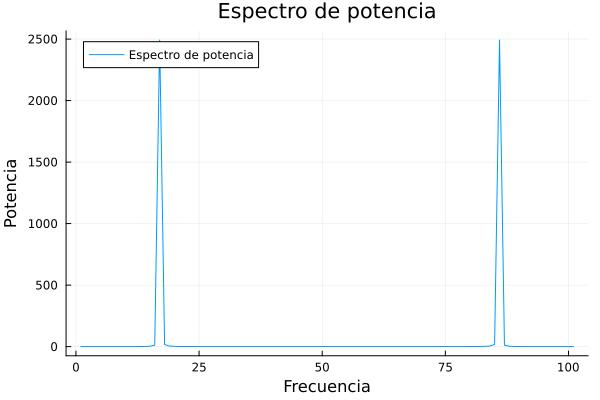

In [9]:
using FFTW

# Señal de juguete o serie de puntos
x = 0.0:0.1:10
signal = sin.(10*x)

# Definición de espectro de potencia
dft = abs.(fft(signal)).^2

using Plots

# Graficar la señal
plot(x, signal, label="Señal", xlabel="x", ylabel="y", title="Señal de juguete")

# Graficar el espectro de potencia
plot(dft, label="Espectro de potencia", xlabel="Frecuencia", ylabel="Potencia", title="Espectro de potencia")

In [2]:
map(x->2x, 1:10)

10-element Vector{Int64}:
  2
  4
  6
  8
 10
 12
 14
 16
 18
 20

## Iteración de muchas condiciones iniciales a la vez

In [11]:
# creamos una malla de números complejos, uso ; para evitar 
iniciales = [x + y*im for x in -2:0.1:2, y in -2:0.1:2];

Definimos una función en el sentido usual

In [12]:
f(x) = x - (x^4 + 4)/(4*x^3)

f (generic function with 1 method)

Copiamos la condicion inicial para crear un arreglo para iterar. La función de broadcast aparece compactificada como el punto (ver manual de Julia para más detalles). A continuación aplicamos `f` como ya se explicó, con  `f.` aplicamos la función a cada componente. Luego, como `=.` la idea es actualizar cada elemento de iterator, sin el punto nos dará error.

In [16]:
iterator = deepcopy(iniciales)
[iterator .= f.(iterator) for i in 1:10]
iterator

41×41 Matrix{ComplexF64}:
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
     ⋮                               ⋱                              ⋮
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im
  1.

Si observan, en la tabla están las $4$ racíces.

In [17]:
typeof(iterator)

Matrix{ComplexF64} (alias for Array{Complex{Float64}, 2})

In [19]:
typeof(Complex)

UnionAll

Otra forma de hacerlo cuyos detalles se explicarán en clase:

In [28]:
function f!(x::Matrix{Complex{Float64}})
    x.= f.(x) 
end

f! (generic function with 1 method)

In [31]:
iterator = deepcopy(iniciales);
for i in 1:10
    f!(iterator)
end
iterator

41×41 Matrix{ComplexF64}:
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
     ⋮                               ⋱                              ⋮
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im
  1.

Lo que sigue es hacer una función que etiquete las raíces de 1 a 4, para luego hacer el heatmap.